## Transient Grating 

In this file we are demonstrating the use of our software package in order to simulate 1-D transient grating in a 3 temperature model. 
The setup of this simulation is, that we are considering the surface of a platinum layer, which initially has a sinusoidal distribution of hot spots, along the surface. The hot spots are initial conditions to the electron temperature. The Lattice and the spin temperature are set to 300K, i.e. room temperature. 


Two effects can be seen: 
* Temperature relaxation  $ T_e = T_l = T_S$
* Thermal diffusion       $ T_e(x) \rightarrow T_e $, $ T_l(x) \rightarrow T_l $ and $ T_s(x) \rightarrow T_s $ 

The dynamics of those effects strongly depend on the grating period and on the strength of the coupling constant between the systems under consideration. 

For further reading: "_Non- equilibrium transient thermal grating relaxation in metal_", by A.A. Maznev, J.A. Johnson 

The workflow of this session is: 
* 1) Import all the packages needed: [TTMObject](https://github.com/udcm-su/heat-diffusion-1D/blob/master/Code/TTMObject.py),[Numpy](https://pypi.org/project/numpy/); [Matplotlib](https://pypi.org/project/matplotlib/) [B-splines](https://github.com/johntfoster/bspline); [Progressbar](https://pypi.org/project/tqdm/); [Numerical Units](https://pypi.org/project/numericalunits/)
* 2) Define a sinusoidal function in order to set the initial conditions on the electron system
* 3) Define the parameters of the material under consideration
* 4) Initialize the classes of the object: $Source \rightarrow Simulation \rightarrow Visual$


In [45]:
import numpy as np
from TTMObject import * 
import numericalunits as u
u.reset_units('SI')

Define a function, which creates smooth sinusoidal heating.

For transient grating the heating can be assumed to be instantaneous, which is why we can apply the heating as initial conditions to the electron system and not let it happen through an external source term. 

In [46]:
#Creating a function that creates a smooth initial heating. 
def sininit(xgr,blocks,init,value): 
    frequency = blocks*np.pi/xgr[-1]
    value = value-init
    return(init+value*np.sin(frequency*xgr)**2)

In [47]:
#Create a function handle that consists of the block function but the only
#free input argument is x. Then we designed a function handle, just as the 
#input of sim.temp_data.init demands it for the initial conditions
blocks = 10;        #How many heat peaks are there on the surface
initialtemp = 300   #K
gratingtemp = 1000  #K magnitude of the peak
gratingsin  = lambda x: sininit(x,blocks,initialtemp,gratingtemp) #This function handle will get passed on to the object

Since the program formally demands a source to be passed on to the simulation object, we are defining it here, but with zero fluence. Note however, that the property `s.optical_penetration_depth` is a list of length 5. This is relevant and important, since we are letting our surface consist of 5 consecutive platinum layers. 

Of course one can add more platinum layers, to represent the surface of one´s material, note however, that the more layers are set, the better is the precision of one´s simulation, but the longer the simulation will take. 

In [48]:
#The source is just a place holder => fluence = 0
s                           = source()
s.sourcetype                = "Gaussian"     
s.optical_penetration_depth = [50*u.nm,50*u.nm,50*u.nm,50*u.nm,50*u.nm]  
s.FWHM                      = 0.1*u.ps 
#Setting the intensity of the source to 0
s.fluence                   = 0*u.mJ/u.cm**2 

In [49]:
#Platinum input parameters 
length_Pt   = 10*u.nm #length of one surface part. (5*10nm = 50nm in total)
k_el_Pt     = 73*u.W/(u.m*u.K);#heat conductivity (can in principle also be a function of the temperature, like C_el_Pt)
k_lat_Pt    = k_el_Pt
rho_Pt      = 1e3*21*u.kg/(u.m**3) #density of Platinum
C_el_Pt     = lambda Te: (740*u.J/(u.m**3*u.K**2))/(1e3*21*u.kg/(u.m**3)) *Te #heat capacity of the electron system
C_lat_Pt    = 2.8e6*u.J/(u.m**3*u.K**2)/rho_Pt #heat capacity of the lattice system
G_EL_Pt     = 1e17*25*u.W/(u.m**3*u.K)#coupling between the electron and the lattice system



In [50]:
#Initialize Simulation and decide how many coupled temperatures are under consideration
sim                     = simulation(2,s) #Now a two temperature model is under consideration
sim.final_time          = 0.6*u.ps# Final time of the simulation
sim.temp_data.init      = gratingsin#  Initial condition of the electron system
sim.temp_data_Lat.init  = 300 #Initial condition of the lattice system

In [51]:
#Add layers with respective parameters for each system and run the simulation
#lengt, conductivity [electron, lattice], heatCapacity [electron, lattice], density, linear Coupling[EL, LS] 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_EL_Pt]) 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_EL_Pt])
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_EL_Pt])
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_EL_Pt])
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,[G_EL_Pt])
#In order to get the raw output of the solution in array form
[phi_e,phi_l,x,t] = sim.run() 

-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 5.56e-16 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:00<00:00, 2033.95it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.5309863090515137
-----------------------------------------------------------


------------------------------------------------------------
The simulation object of the2 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:00<00:00, 1981.29it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 0.5450999736785889
-----------------------------------------------------------
Simulation of a 2- temperature system


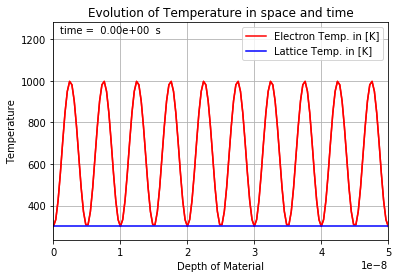

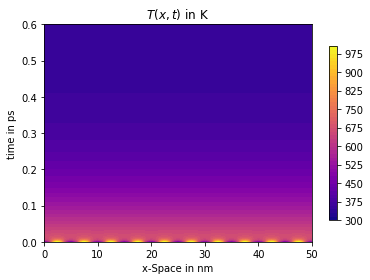

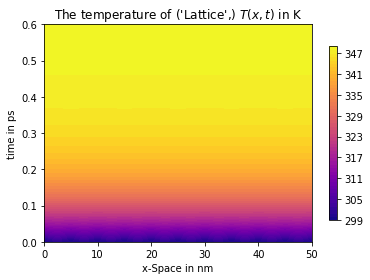

In [52]:
#Define a visual object and show the result
v = visual(sim)
ani = v.animation(1,0)

v.contour()
v.contour('Lattice')

If one would want to simulate a three temperature system, the only thing, that has to be modified is the simulation class. 

That is, we define some extra parameters for the third system and let the simulation run. 
Note, that material parameters for the coupling of spin- lattice and spin- electron systems are not very well explored, which is why we are setting them to be arbitrary for now. The aim is to use this freedom of parameter choice to get a better idea of the nature, once simulations with different parameters were run and the results are compared to experimental data. 

In [53]:
#add parameters for the layer and all three systems demonstrational values
C_sp_Pt     = C_lat_Pt  
k_sp_Pt     = k_el_Pt
G_LS_Pt     = G_EL_Pt/3 
G_SE_Pt     = G_EL_Pt/2

#Overwrite the old simulation object and do a 3 temperature simulation
sim                     = simulation(3,s) #Now a three temperature model is under consideration
sim.final_time          = 0.6*u.ps
sim.temp_data.init      = gratingsin
sim.temp_data_Lat.init  = 300 

#lengt, conductivity [electron, lattice,spin], heatCapacity [electron, lattice,spin], density, linear Coupling[EL, LS,SE] 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt,k_sp_Pt],[C_el_Pt,C_lat_Pt,C_sp_Pt],rho_Pt,[G_EL_Pt,G_LS_Pt,G_SE_Pt]) 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt,k_sp_Pt],[C_el_Pt,C_lat_Pt,C_sp_Pt],rho_Pt,[G_EL_Pt,G_LS_Pt,G_SE_Pt]) 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt,k_sp_Pt],[C_el_Pt,C_lat_Pt,C_sp_Pt],rho_Pt,[G_EL_Pt,G_LS_Pt,G_SE_Pt]) 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt,k_sp_Pt],[C_el_Pt,C_lat_Pt,C_sp_Pt],rho_Pt,[G_EL_Pt,G_LS_Pt,G_SE_Pt]) 
sim.addLayer(length_Pt,[k_el_Pt,k_lat_Pt,k_sp_Pt],[C_el_Pt,C_lat_Pt,C_sp_Pt],rho_Pt,[G_EL_Pt,G_LS_Pt,G_SE_Pt]) 
#in order to get the raw output in array form
#[phi_e,phi_l,phi_s,x,t] = sim.run() 

------------------------------------------------------------
The simulation object of the3 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 4.02e-16 s
-----------------------------------------------------------
-----------------------------------------------------------
Gaussian source type is applied
-----------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 1492/1492 [00:01<00:00, 1304.06it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-latticelspin system has been simulated
Eleapsed time in E.E.- loop: 1.1441173553466797
-----------------------------------------------------------


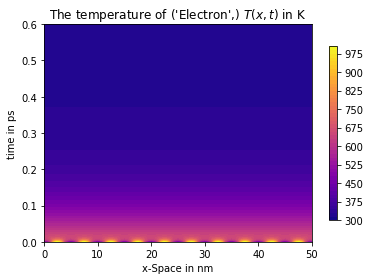

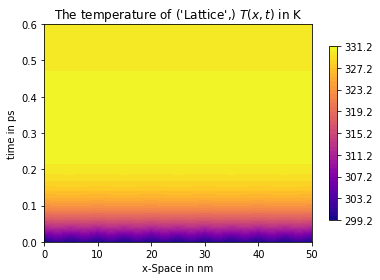

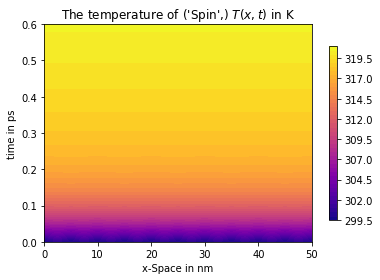

In [54]:
v = visual(sim)
v.contour('Electron')
v.contour('Lattice')
v.contour('Spin')

Summarizing we have seen how to initialize the simulation with sinusoidal initial conditions on the electron temperature, modeling the transient grating. Late we did simulations in the two and in the three temperature case and visualized the dynamics in space and in time via contour plots of the individual systems. 